# Report on Customer Support Data Analysis

## Introduction
This notebook presents a comprehensive analysis of customer support data to identify key areas for improvement in customer satisfaction. The purpose of this analysis is to uncover insights from customer interactions and support queries.

## Objectives
- To analyze customer satisfaction trends.
- To evaluate the volume and types of customer queries.
- To recommend strategies for improving customer support efficiency.

## 1. Data Exploration and Preprocessing

### 1.1 Loading and Inspecting the Dataset


In [38]:
# Importing Necessary Libraries
import pandas as pd  # for data manipulation
import numpy as np   # for numerical operations
import matplotlib.pyplot as plt  # for creating visualizations
import seaborn as sns  # for enhanced statistical visualizations
import requests
import zipfile
import io
import os

# Define the URL of the dataset
url = 'https://www.kaggle.com/api/v1/datasets/download/ddosad/ecommerce-customer-service-satisfaction?datasetVersionNumber=3'

# Download the dataset
response = requests.get(url)
response.raise_for_status()  # Ensure we notice bad responses

# Define the current directory path
current_dir = os.getcwd()

# Extract the dataset
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    z.extractall(current_dir)

# Load the dataset into a DataFrame
file_path = os.path.join(current_dir, 'Customer_support_data.csv')
customer_support_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
customer_support_data.head()


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


#### Load Data
This section loads the customer support data from a CSV file and displays the first few rows to get an initial understanding of its structure.


In [39]:
# Displaying Information about the Data
customer_support_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

#### Data Information
This section displays information about the loaded data, such as column names, data types, and missing values.


In [40]:
# Displaying First Few Rows of the Data
customer_support_data.head()


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


#### First Few Rows
This section displays the first few rows of the loaded data.


In [41]:
# Descriptive Statistics of the Data
customer_support_data.describe()


,Item_price,connected_handling_time,CSAT Score
count,17206.000000,242.000000,85907.000000
mean,5660.774846,462.400826,4.242157
std,12825.728411,246.295037,1.378903
min,0.000000,0.000000,1.000000
25%,392.000000,293.000000,4.000000
50%,979.000000,427.000000,5.000000
75%,2699.750000,592.250000,5.000000
max,164999.000000,1986.000000,5.000000


#### Descriptive Statistics
This section provides descriptive statistics of the numerical columns in the data, such as mean, standard deviation, minimum, maximum, etc.


In [42]:
# Function to summarize the dataset
def summary(customer_support_data):
    summary_df = pd.DataFrame(customer_support_data.dtypes, columns=['Data Type'])
    summary_df['# Missing'] = customer_support_data.isnull().sum().values
    summary_df['Duplicate'] = customer_support_data.duplicated().sum()
    summary_df['# Unique'] = customer_support_data.nunique().values
    desc = pd.DataFrame(customer_support_data.describe(include='all').transpose())
    summary_df['Min'] = desc['min'].values
    summary_df['Max'] = desc['max'].values
    summary_df['Mean'] = desc['mean'].values
    summary_df['Std Dev'] = desc['std'].values
    summary_df['Top Value'] = desc['top'].values
    summary_df['Freq'] = desc['freq'].values

    return summary_df

# Display the summary of the dataset
summary(customer_support_data).style.set_caption("**Summary of the Train Data**").\
background_gradient(cmap='Pastel2_r', axis=0). \
set_properties(**{'border': '1.3px dotted', 'color': '', 'caption-side': 'left'})


,Data Type,# Missing,Duplicate,# Unique,Min,Max,Mean,Std Dev,Top Value,Freq
Unique id,object,0,0,85907,nan,nan,nan,nan,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,1
channel_name,object,0,0,3,nan,nan,nan,nan,Inbound,68142
category,object,0,0,12,nan,nan,nan,nan,Returns,44097
Sub-category,object,0,0,57,nan,nan,nan,nan,Reverse Pickup Enquiry,22389
Customer Remarks,object,57165,0,18231,nan,nan,nan,nan,Good,1390
Order_id,object,18232,0,67675,nan,nan,nan,nan,c27c9bb4-fa36-4140-9f1f-21009254ffdb,1
order_date_time,object,68693,0,13766,nan,nan,nan,nan,09/08/2023 11:55,7
Issue_reported at,object,0,0,30923,nan,nan,nan,nan,15/08/2023 10:59,13
issue_responded,object,0,0,30262,nan,nan,nan,nan,28/08/2023 00:00,3378
Survey_response_Date,object,0,0,31,nan,nan,nan,nan,28-Aug-23,3452


### Data Summary
This section provides a detailed summary of the dataset, including data types, missing values, duplicates, unique values, and descriptive statistics such as minimum, maximum, mean, standard deviation, top value, and frequency.


## Dataset Overview

**Number of Rows:** 85,907  
**Number of Columns:** 20  

### Column Details:

1. **Unique id:** Identifier for each interaction (String)  
2. **channel_name:** Mode of communication (e.g., Inbound, Outcall) (String)  
3. **category:** General classification of the query (String)  
4. **Sub-category:** More specific classification within a category (String)  
5. **Customer Remarks:** Comments or remarks provided by the customer (String)  
6. **Order_id:** Identifier for the customer's order (String)  
7. **order_date_time:** Timestamp of when the order was placed (String)  
8. **Issue_reported at:** Timestamp of when the issue was reported (String)  
9. **issue_responded:** Timestamp of when the issue was responded to (String)  
10. **Survey_response_Date:** Date when the customer feedback was recorded (String)  
11. **Customer_City:** City of the customer (String)  
12. **Product_category:** Category of the product involved in the support query (String)  
13. **Item_price:** Price of the item involved in the query (Float)  
14. **connected_handling_time:** Time taken by the agent to handle the issue (Float)  
15. **Agent_name:** Name of the agent handling the query (String)  
16. **Supervisor:** Supervisor of the agent (String)  
17. **Manager:** Manager of the agent (String)  
18. **Tenure Bucket:** Categorization of the agent's tenure (String)  
19. **Agent Shift:** Shift of the agent (Morning, Evening, etc.) (String)  
20. **CSAT Score:** Customer satisfaction score (Integer)  


### 1.2 Data Preprocessing
In this section, we preprocess the data to ensure it is clean and ready for analysis. This includes converting date columns to datetime format, handling missing values, and extracting relevant information.


In [43]:
# Ensuring 'Issue_reported at' is correctly converted to datetime format
customer_support_data['Issue_reported at'] = pd.to_datetime(customer_support_data['Issue_reported at'], errors='coerce')

# Dropping any rows where 'Issue_reported at' is NaT after conversion
csat_heatmap_data = customer_support_data.dropna(subset=['Issue_reported at'])

# Extracting day of the week from 'Issue_reported at'
csat_heatmap_data['Day of Week'] = csat_heatmap_data['Issue_reported at'].dt.day_name()

# Display the first few rows of the preprocessed data
csat_heatmap_data.head()


/tmp/ipykernel_86664/2343310501.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csat_heatmap_data['Day of Week'] = csat_heatmap_data['Issue_reported at'].dt.day_name()


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,...,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,Day of Week
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,2023-01-08 11:13:00,01/08/2023 11:47,01-Aug-23,...,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5,Sunday
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,2023-01-08 12:52:00,01/08/2023 12:54,01-Aug-23,...,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5,Sunday
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,2023-01-08 20:16:00,01/08/2023 20:38,01-Aug-23,...,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5,Sunday
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,2023-01-08 20:56:00,01/08/2023 21:16,01-Aug-23,...,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5,Sunday
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,2023-01-08 10:30:00,01/08/2023 10:32,01-Aug-23,...,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5,Sunday


#### Data Conversion and Cleanup
This step converts the 'Issue_reported at' column to datetime format, handles any errors during the conversion, and drops rows with missing values in this column. Additionally, it extracts the day of the week from the 'Issue_reported at' column for further analysis.


## 2. Data Visualization and Analysis
In this section, we will visualize and analyze the customer support data to uncover insights and identify trends. This includes visualizing customer satisfaction trends, query volumes, and other relevant metrics.


### 2.1 CSAT Score Distribution

**Motivation:** To gauge overall customer satisfaction and identify if there are common dissatisfactions among the service provided.

**Implementation:** Histogram of CSAT scores to visualize the distribution.


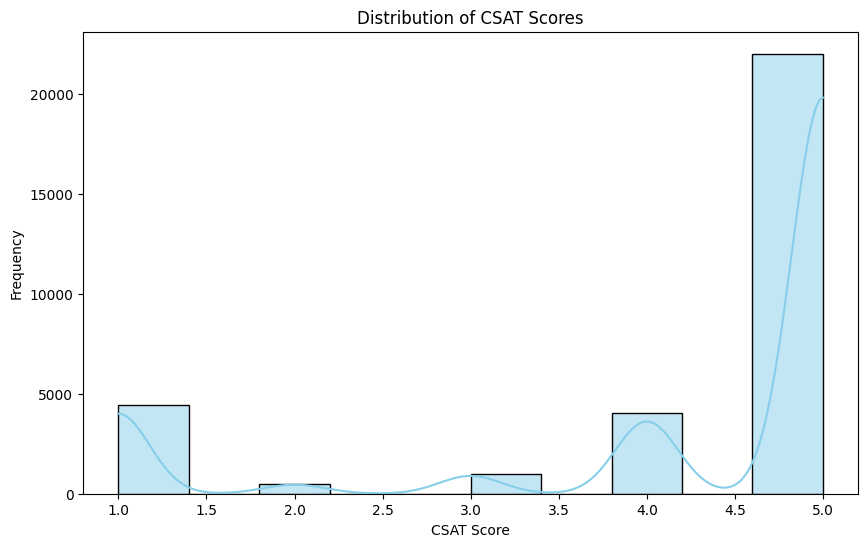

In [44]:
# Plotting the distribution of CSAT scores
plt.figure(figsize=(10, 6))
sns.histplot(csat_heatmap_data['CSAT Score'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of CSAT Scores')
plt.xlabel('CSAT Score')
plt.ylabel('Frequency')
plt.show()


### 2.2 Query Volume by Category

**Motivation:** Understanding the distribution of queries across different categories can help in resource allocation and pinpoint areas that might need more attention or improvement.

**Implementation:** Bar plot to show the number of queries in each category.


/tmp/ipykernel_86664/3622327629.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


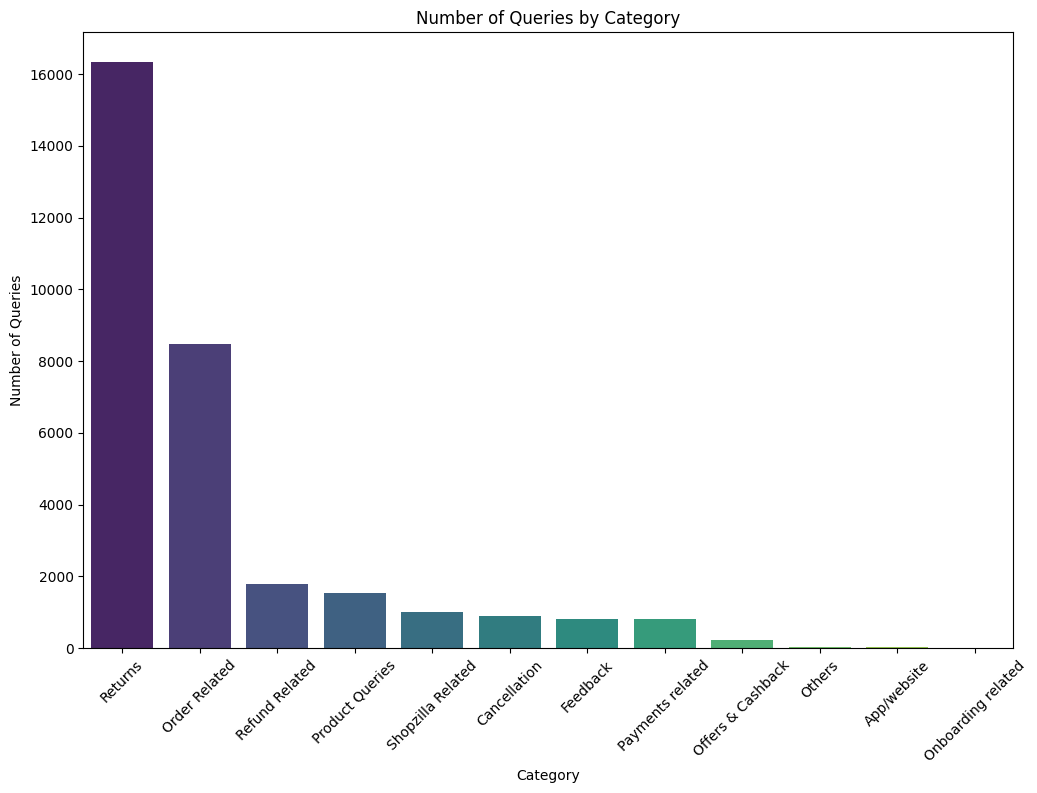

In [45]:
# Plotting the number of queries in each category
plt.figure(figsize=(12, 8))
category_counts = csat_heatmap_data['category'].value_counts()
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Number of Queries by Category')
plt.xlabel('Category')
plt.ylabel('Number of Queries')
plt.xticks(rotation=45)
plt.show()


### 2.3 CSAT Score Analysis by Agent Shift and Day of Week

**Use Case:** Visualizing the relationship between two categorical variables, such as agent shift and day of the week, with CSAT scores.

**Data Preparation:**
1. Extract the day of the week from the 'Issue_reported at' date.
2. Group the data by agent shift and day of the week, then calculate the average CSAT score for each group.


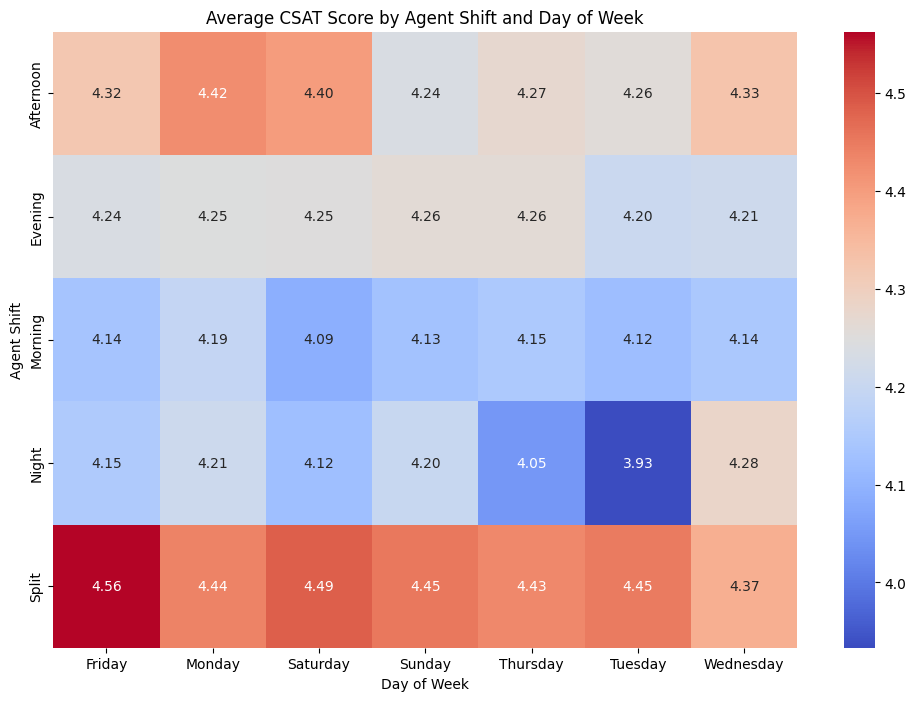

In [46]:
# Grouping the data by agent shift and day of the week, and calculating the average CSAT score for each group
csat_by_shift_day = csat_heatmap_data.groupby(['Agent Shift', 'Day of Week'])['CSAT Score'].mean().unstack()

# Plotting the heatmap for CSAT scores by agent shift and day of the week
plt.figure(figsize=(12, 8))
sns.heatmap(csat_by_shift_day, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Average CSAT Score by Agent Shift and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Agent Shift')
plt.show()


### 2.4 Time Series Analysis

**Use Case:** Trend analysis over time for CSAT scores or query volumes.

1. **Trend of CSAT Scores Over Time**
2. **Trend of Query Volumes Over Time**

**Preparation:** For both analyses, we'll need to ensure that any date-related columns are in the appropriate datetime format. Then, we'll resample the data to a suitable time granularity, like monthly, for clearer visualization and analysis.


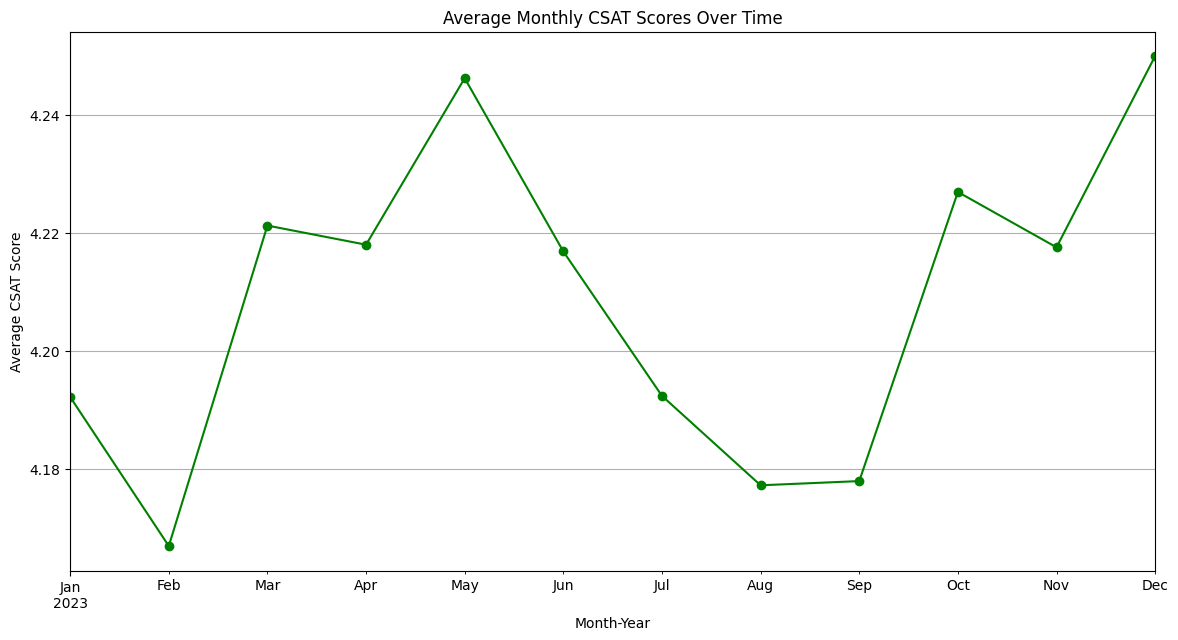

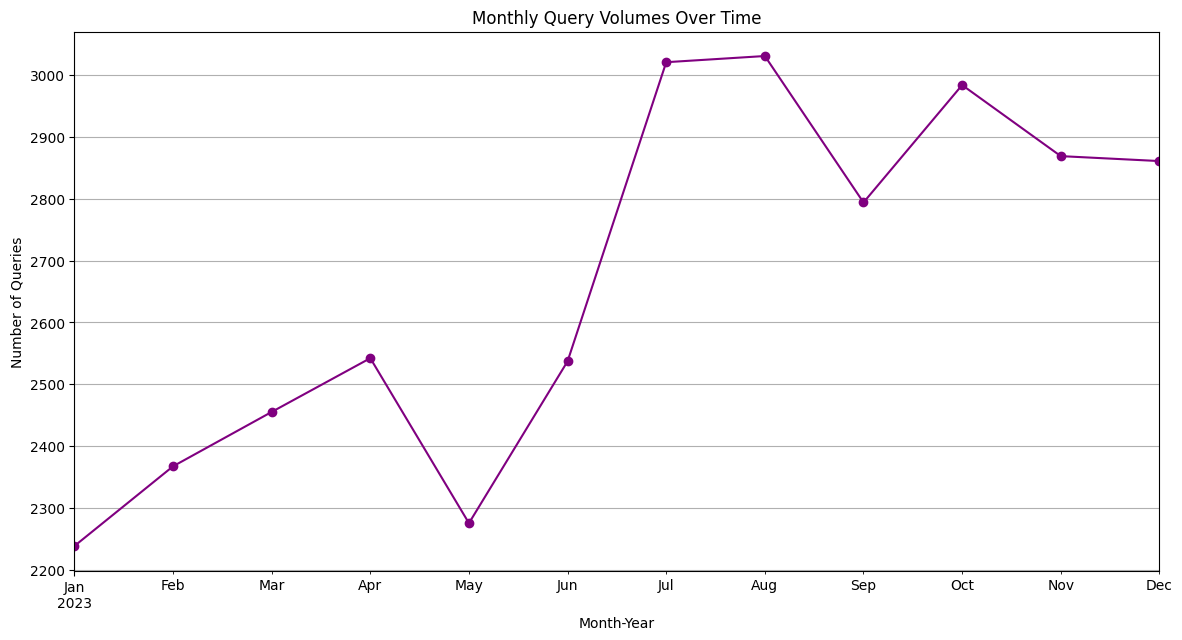

In [47]:
# Ensuring 'Issue_reported at' is already converted and dropping any NaT values
customer_support_data['Issue_reported at'] = pd.to_datetime(customer_support_data['Issue_reported at'], errors='coerce')
csat_time_data = customer_support_data.dropna(subset=['Issue_reported at', 'CSAT Score'])

# Resampling data to calculate monthly average CSAT scores
monthly_csat_scores = csat_time_data.set_index('Issue_reported at').resample('M')['CSAT Score'].mean()

# Plotting the trend of average CSAT Scores over time
plt.figure(figsize=(14, 7))
monthly_csat_scores.plot(marker='o', linestyle='-', color='green')
plt.title('Average Monthly CSAT Scores Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Average CSAT Score')
plt.grid(True)
plt.show()

# Resampling data to calculate monthly query volumes
monthly_query_volumes = customer_support_data['Issue_reported at'].dropna().dt.to_period('M').value_counts().sort_index()

# Plotting the trend of query volumes over time
plt.figure(figsize=(14, 7))
monthly_query_volumes.plot(kind='line', marker='o', linestyle='-', color='purple')
plt.title('Monthly Query Volumes Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Number of Queries')
plt.grid(True)
plt.show()
